# Part 1 - Exploratory data analysis

In [508]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [509]:
# load the json data
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [510]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [511]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [512]:
# add 1 to each rows as there is no data column but the datetime which will be set to index
df['count'] = 1

In [513]:
df.set_index('login_time', inplace=True)
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [514]:
# Downsampling to 15 mins and count the records
df_count = df.resample('15T').count()

In [515]:
df_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


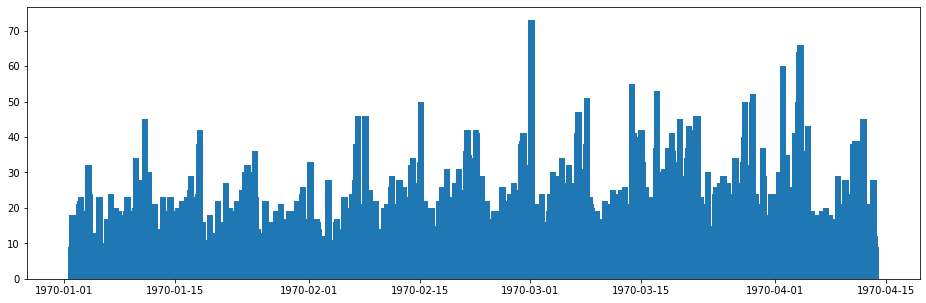

In [516]:
plt.figure(figsize=(16,5))
plt.bar(df_count.index, df_count['count'])
plt.show()

It looks there is a weekly pattern.  
We can also downsample the data to daily one to see more details.

In [517]:
df_daily = df.resample('D').sum()
df_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


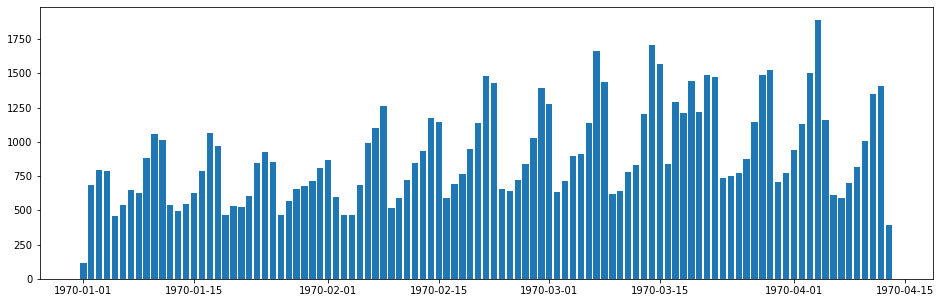

In [518]:
plt.subplots(1,1,figsize=(16,5))
plt.bar(df_daily.index, df_daily['count'])
plt.show()

We can more clearly see that there is a weekly pattern as same as the above, so I will add a column showing the day of week.

In [519]:
df_daily["login_time"] = df_daily.index
df_daily["login_time-dayofweek"] = df_daily["login_time"].dt.day_name()
#df_daily["login_time-dayofweek(int)"] = df_daily["login_time"].dt.dayofweek
df_daily.head()

,count,login_time,login_time-dayofweek
login_time,,,
1970-01-01,112,1970-01-01,Thursday
1970-01-02,681,1970-01-02,Friday
1970-01-03,793,1970-01-03,Saturday
1970-01-04,788,1970-01-04,Sunday
1970-01-05,459,1970-01-05,Monday


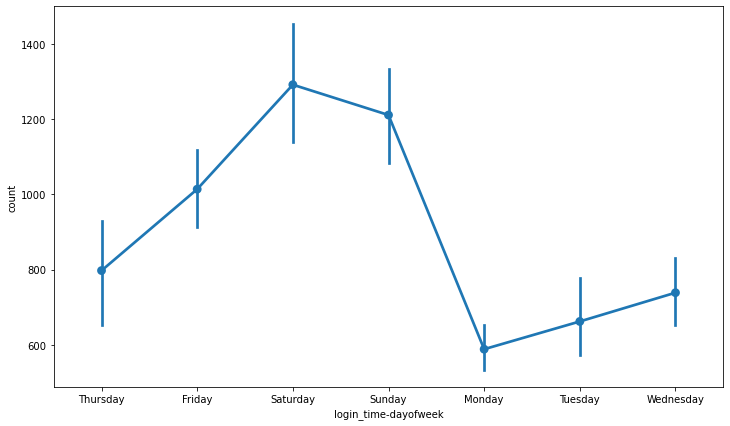

In [520]:
plt.figure(figsize = (12, 7))
sns.pointplot(data=df_daily, x="login_time-dayofweek", y="count")

Now we can see that the login numbers are higher on the weekend than on the weekdays.

# Part 2 - Experiment and metrics design

<b>1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</b>  
--> If the active ratio of Ultimate Gotham at night increases and the active ration of Ultimate Metropolis during the daytime increases, we can say that the experiment is successful as it means the both driver partners have been positively affected by the experiment.

<b>2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  
a) how you will implement the experiment  
b) what statistical test(s) you will conduct to verify the significance of the observation  
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.</b>  
--> I will measure the acitivity number of each vehicles in neighbor cities and compare it to the past data. For this experiment, I would use a correlation test, such as Pearson’s r, as we would like to check whether the toll fee is related to the activities of each driver partners in neighbor's city or not. If the activity ration increases after the toll fee reimbursed, we can recommend to adopt the reimbrusement system in order to encourage drivers to be available in both cities.

# Part 3 - Predictive modeling

In [521]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [522]:
# load the json data
df = pd.read_json("ultimate_data_challenge.json")
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [523]:
df.shape

(50000, 12)

In [524]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [525]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [526]:
# check if there are null values
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [527]:
# fill the null values in column 'avg_rating_of_driver' and 'avg_rating_by_driver' with the mean value
df['avg_rating_of_driver'].fillna(df.avg_rating_of_driver.mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df.avg_rating_by_driver.mean(), inplace=True)

In [528]:
# check what kinds of phones in 'phone' column
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [529]:
# fill the null values in column 'phone' with non-null values forward
df['phone'].fillna(method="ffill", inplace=True)

In [530]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Change the 'trips_in_first_30_days' into range from discrete numbers as it has too many values.

In [531]:
df['no_trips_in_first_30_days'] = df['trips_in_first_30_days'] == 0
df['less_trips_in_first_30_days'] = (df['trips_in_first_30_days'] >= 1) & (df['trips_in_first_30_days'] <= 4)
df['often_trips_in_first_30_days'] = df['trips_in_first_30_days'] >= 5

In [532]:
df.drop(columns='trips_in_first_30_days', inplace=True)

In [533]:
print(df['last_trip_date'].min(), 'to', df['last_trip_date'].max())

2014-01-01 to 2014-07-01


Since the latest data of 'last_trip_date' is '2014-07-01', we can consider a user retained if they took a trip in June.

In [534]:
# create a new column 'retained'
# if the '2014-07-01' minus 'last_trip_date' is 30 days or less, the value is 1
# otherwise, the value is 0
df.loc[(pd.to_datetime('2014-07-01') - pd.to_datetime(df['last_trip_date'])) <= '30 days', 'retained'] = 1
df.loc[(pd.to_datetime('2014-07-01') - pd.to_datetime(df['last_trip_date'])) > '30 days', 'retained'] = 0

In [535]:
df.head(10)

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_trips_in_first_30_days,less_trips_in_first_30_days,often_trips_in_first_30_days,retained
0,King's Landing,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,True,False,1.0
1,Astapor,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,True,False,False,0.0
2,Astapor,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,True,False,0.0
3,King's Landing,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,False,True,1.0
4,Winterfell,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,True,0.0
5,Winterfell,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,False,True,False,1.0
6,Astapor,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False,True,False,0.0
7,Winterfell,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False,True,False,0.0
8,Winterfell,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False,True,False,0.0
9,Winterfell,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False,True,False,0.0


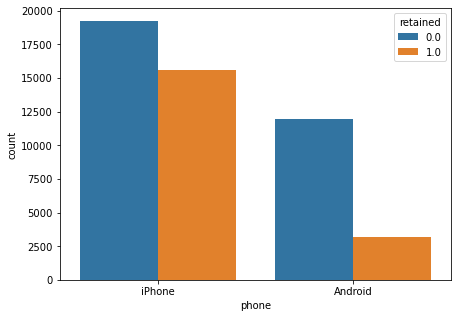

In [536]:
plt.figure(figsize = (7, 5))
sns.countplot(data=df, x="phone", hue='retained')

We can see that the retained ration on iPhone users are much higher than Android users.

Apply one-hot encoding for the column 'city' and 'phone' as they are non-numerical columns.

In [537]:
# check how many unique names in column 'city'
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [538]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['phone'])], axis=1)
df.drop(columns=['city', 'phone'], inplace=True)
df.head()

,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_trips_in_first_30_days,less_trips_in_first_30_days,often_trips_in_first_30_days,retained,Astapor,King's Landing,Winterfell,Android,iPhone
0,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False,True,False,1.0,0,1,0,0,1
1,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,True,False,False,0.0,1,0,0,1,0
2,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,False,True,False,0.0,1,0,0,0,1
3,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False,False,True,1.0,0,1,0,0,1
4,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,False,True,0.0,0,0,1,1,0


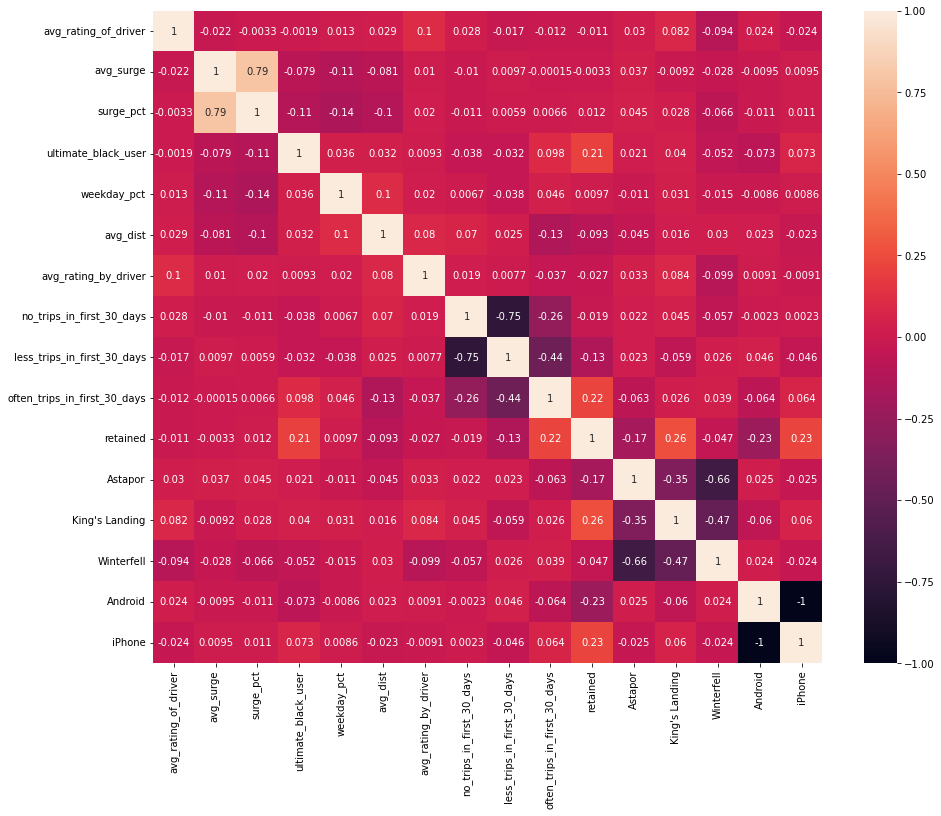

In [539]:
plt.figure(figsize=(15, 12))
correlation = df.corr()
sns.heatmap(correlation, annot=True)

It looks below 4 columns are correlated to the 'retained', so we will look further.  
['ultimate_black_user', 'often_trips_in_first_30_days', 'King's Landing', 'iPhone']

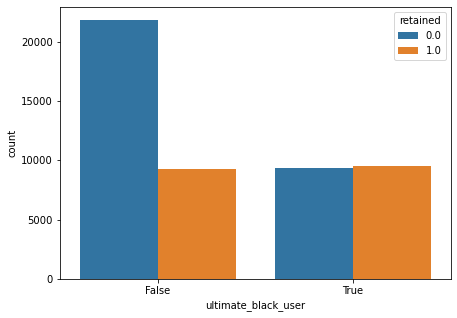

In [540]:
plt.figure(figsize = (7, 5))
sns.countplot(data=df, x='ultimate_black_user', hue='retained')

We can see that the ultimate black users are more retained than the general users.

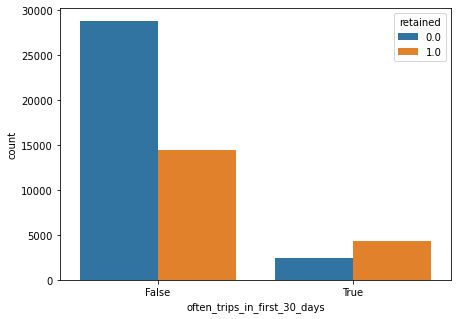

In [541]:
plt.figure(figsize = (7, 5))
sns.countplot(data=df, x='often_trips_in_first_30_days', hue='retained')

We can see that users who have 5 or more trips are more retained than the others.

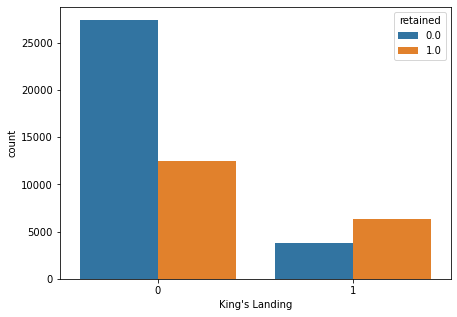

In [542]:
plt.figure(figsize = (7, 5))
sns.countplot(data=df, x="King's Landing", hue='retained')

We can see that users who signed up in King's Landing tend to be retained more than other cities.

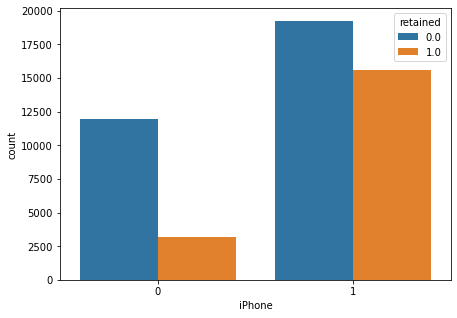

In [543]:
plt.figure(figsize = (7, 5))
sns.countplot(data=df, x="iPhone", hue='retained')

As we already saw above, the retained ration on iPhone users are much higher than Android users.

I will decide these 4 columns as a feature.

In [544]:
feature = ['ultimate_black_user', 'often_trips_in_first_30_days', "King's Landing", 'iPhone']

In [545]:
label = ['retained']

In [546]:
X = df[feature]
y = df[label]

In [547]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [548]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [549]:
# import evaluation modules
from sklearn import metrics
from sklearn.metrics import f1_score

Accuracy:  0.7076
f1-score:  0.5339496334077143


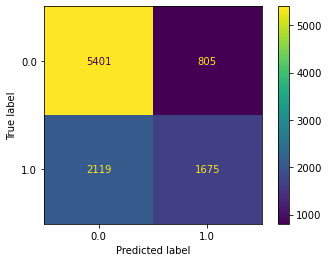

In [550]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("f1-score: ", f1_score(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(dt, X_test, y_test)
print(confusion_matrix)

In [551]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [552]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=37)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<ipython-input-552-0c4605bc1383>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy:  0.7187
f1-score:  0.5460706793609812


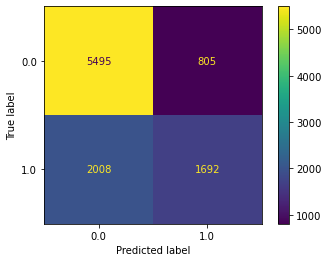

In [553]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("f1-score: ", f1_score(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(rf, X_test, y_test)
print(confusion_matrix)

In [554]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [555]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.7091
f1-score:  0.5393507521773556


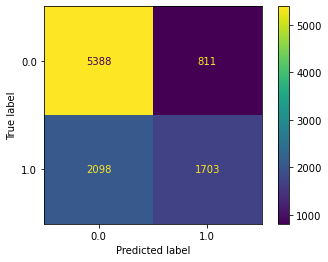

In [556]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("f1-score: ", f1_score(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test)
print(confusion_matrix)

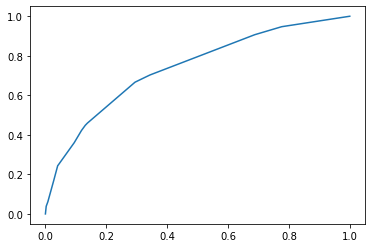

In [557]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [558]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: ", round(auc, 2))

AUC:  0.74


## 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [559]:
# Count the retained customers
df.loc[df['retained'] == 1.0]

,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_trips_in_first_30_days,less_trips_in_first_30_days,often_trips_in_first_30_days,retained,Astapor,King's Landing,Winterfell,Android,iPhone
0,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False,True,False,1.0,0,1,0,0,1
3,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False,False,True,1.0,0,1,0,0,1
5,2014-01-09,3.5,1.00,2014-06-06,0.0,True,100.0,10.56,5.0,False,True,False,1.0,0,0,1,0,1
13,2014-01-29,4.0,1.38,2014-06-08,50.0,False,50.0,3.04,5.0,True,False,False,1.0,0,1,0,0,1
16,2014-01-11,5.0,1.00,2014-06-28,0.0,True,50.0,10.86,3.0,False,True,False,1.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,2014-01-21,2.0,1.00,2014-07-01,0.0,False,100.0,2.39,4.0,True,False,False,1.0,0,1,0,0,1
49988,2014-01-20,4.5,1.00,2014-06-14,0.0,False,50.0,2.53,5.0,False,True,False,1.0,0,1,0,0,1
49991,2014-01-08,5.0,1.25,2014-06-29,100.0,False,0.0,1.06,5.0,True,False,False,1.0,0,0,1,0,1
49993,2014-01-03,4.8,1.11,2014-07-01,11.1,True,55.6,2.53,4.7,False,True,False,1.0,1,0,0,0,1


18,804 out of 50,000 users were retained (37.61%)

## 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

I've run three models to predict whether a user will be active in their 6th month on the system.  
  
- Decision Tree  
Accuracy:  0.7076  
f1-score:  0.5339  
  
  
- Random Forest  
Accuracy:  0.7187  
f1-score:  0.5460  
  
  
- Logistic Regression  
Accuracy:  0.7091  
f1-score:  0.5393  

I used 'Accuracy' and 'f1-score' to evaluate the models, and Random Forest showed slightly better results in both metrics than other models.

## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

1. Increase Ultimate Black with qualified vehicles and drivers.
2. Promote some events for the new users to induce them to use Ultimate mainly at the initial steps so that they can be stuck with Ultimate.
3. If there is any differences between iOS and Android apps, keep improving Android apps so that the Android users could be satisfied with the app experience.